### Insurance Fraud Detection

#### Steps
1. ### Data Understanding
2. ### Exploratory Data Analysis
3. ### Cleaning the Data
4. ### Splitting the Data into Training and Testing Sets
5. ### Model Building
6. ### Model Evaluation
7. ### Prediction

### Step1: Data Understanding

In [185]:
# Supressing the warnings.

import warnings
warnings.filterwarnings('ignore')

In [290]:
# Importing the required libraries and packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

In [187]:
#Importing the data
df=pd.read_csv('insurance_data.csv')

In [188]:
# Viewing the data
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type   collision_type incident_severity authorities_contacted incident_state incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make auto_model  auto_year fraud_reported  _c39
0                 328   48         521585       17-10-2014           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage                Police             SC      Columbus     9935 4th Drive                         5                            1             YES                1          2                     YES               71610          6510           13020          52080       Saab        92x       2004              Y   NaN
1                 228   42         342868       27-06-2006           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft                ?      Minor Damage                Police             VA     Riverwood       6608 MLK Hwy                         8                            1               ?                0          0                       ?                5070           780             780           3510   Mercedes       E400       2007              Y   NaN
2                 134   29         687698       06-09-2000           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage                Police             NY      Columbus  7121 Francis Lane                         7                            3              NO                2          3                      NO               34650          7700            3850          23100      Dodge        RAM       2007              N   NaN
3                 256   41         227811       25-05-1990           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage                Police             OH     Arlington   6956 Maple Drive                         5                            1               ?                1          2                      NO               63400          6340            6340          50720  Chevrolet      Tahoe       2014              Y   NaN
4                 228   44         367455       06-06-2014           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft                ?      Minor Damage                  None             NY     Arlington       3041 3rd Ave                        20                            1              NO                0          1                      NO                6500          1300             650           4550     Accura        RSX       2009              N   NaN

In [189]:
# checking different aspects of the data
df.shape

(1000, 40)

In [190]:
# Looking at the statistical aspects of the dataframe.
df.describe(percentiles=[00.0,0.35,0.50,0.75,0.90,0.95])

months_as_customer          age  policy_number  policy_deductable  policy_annual_premium  umbrella_limit    insured_zip  capital-gains   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries    witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim    auto_year  _c39
count         1000.000000  1000.000000    1000.000000        1000.000000            1000.000000    1.000000e+03    1000.000000    1000.000000    1000.000000               1000.000000                   1000.00000      1000.000000  1000.000000          1000.00000   1000.000000     1000.000000    1000.000000  1000.000000   0.0
mean           203.954000    38.948000  546238.648000        1136.000000            1256.406150    1.101000e+06  501214.488000   25126.100000  -26793.700000                 11.644000                      1.83900         0.992000     1.487000         52761.94000   7433.420000     7399.570000   37928.950000  2005.103000   NaN
std            115.113174     9.140287  257063.005276         611.864673             244.167395    2.297407e+06   71701.610941   27872.187708   28104.096686                  6.951373                      1.01888         0.820127     1.111335         26401.53319   4880.951853     4824.726179   18886.252893     6.015861   NaN
min              0.000000    19.000000  100804.000000         500.000000             433.330000   -1.000000e+06  430104.000000       0.000000 -111100.000000                  0.000000                      1.00000         0.000000     0.000000           100.00000      0.000000        0.000000      70.000000  1995.000000   NaN
0%               0.000000    19.000000  100804.000000         500.000000             433.330000   -1.000000e+06  430104.000000       0.000000 -111100.000000                  0.000000                      1.00000         0.000000     0.000000           100.00000      0.000000        0.000000      70.000000  1995.000000   NaN
35%            146.000000    34.000000  421643.200000        1000.000000            1159.980000    0.000000e+00  456601.300000       0.000000  -44000.000000                  8.000000                      1.00000         1.000000     1.000000         50765.00000   5540.000000     5633.000000   35509.500000  2002.000000   NaN
50%            199.500000    38.000000  533135.000000        1000.000000            1257.200000    0.000000e+00  466445.500000       0.000000  -23250.000000                 12.000000                      1.00000         1.000000     1.000000         58055.00000   6775.000000     6750.000000   42100.000000  2005.000000   NaN
75%            276.250000    44.000000  759099.750000        2000.000000            1415.695000    0.000000e+00  603251.000000   51025.000000       0.000000                 17.000000                      3.00000         2.000000     2.000000         70592.50000  11305.000000    10885.000000   50822.500000  2010.000000   NaN
90%            371.000000    53.000000  914160.700000        2000.000000            1564.724000    6.000000e+06  614000.400000   64420.000000       0.000000                 21.000000                      3.00000         2.000000     3.000000         81364.00000  14380.000000    14142.000000   58728.000000  2013.000000   NaN
95%            429.050000    57.000000  954279.100000        2000.000000            1653.443500    6.000000e+06  617463.350000   70615.000000       0.000000                 23.000000                      3.00000         2.000000     3.000000         88413.00000  15662.000000    15540.000000   63094.500000  2014.000000   NaN
max            479.000000    64.000000  999435.000000        2000.000000            2047.590000    1.000000e+07  620962.000000  100500.000000       0.000000                 23.000000                      4.00000         2.000000     3.000000        114920.00000  21450.000000    23670.000000   79560.000000  2015.000000   NaN

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

### Step2: Cleaning the Data

In [192]:
# checking for null value
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [193]:
# Dropping column _c39 as all values are null
df.drop('_c39',axis=1,inplace=True)

In [194]:
df.shape

(1000, 39)

In [195]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [196]:
# checking for column 'police_report_available'
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

__As the value is almost having null value will drop the column__

In [197]:
df.drop('police_report_available',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type   collision_type incident_severity authorities_contacted incident_state incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make auto_model  auto_year fraud_reported
0                 328   48         521585       17-10-2014           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage                Police             SC      Columbus     9935 4th Drive                         5                            1             YES                1          2               71610          6510           13020          52080       Saab        92x       2004              Y
1                 228   42         342868       27-06-2006           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft                ?      Minor Damage                Police             VA     Riverwood       6608 MLK Hwy                         8                            1               ?                0          0                5070           780             780           3510   Mercedes       E400       2007              Y
2                 134   29         687698       06-09-2000           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage                Police             NY      Columbus  7121 Francis Lane                         7                            3              NO                2          3               34650          7700            3850          23100      Dodge        RAM       2007              N
3                 256   41         227811       25-05-1990           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage                Police             OH     Arlington   6956 Maple Drive                         5                            1               ?                1          2               63400          6340            6340          50720  Chevrolet      Tahoe       2014              Y
4                 228   44         367455       06-06-2014           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft                ?      Minor Damage                  None             NY     Arlington       3041 3rd Ave                        20                            1              NO                0          1                6500          1300             650           4550     Accura        RSX       2009              N

In [198]:
# Dropping the duplicate rows on the basis of 'policy_number' column, if any.

df = df.drop_duplicates(subset = 'policy_number')
df.shape

(1000, 38)

In [199]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [200]:
#changing Y=1 and N=0 in fraud_reported
df['fraud_reported']=df['fraud_reported'].apply(lambda x: 1 if x=='Y' else 0)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type   collision_type incident_severity authorities_contacted incident_state incident_city  incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make auto_model  auto_year  fraud_reported
0                 328   48         521585       17-10-2014           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage                Police             SC      Columbus     9935 4th Drive                         5                            1             YES                1          2               71610          6510           13020          52080       Saab        92x       2004               1
1                 228   42         342868       27-06-2006           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft                ?      Minor Damage                Police             VA     Riverwood       6608 MLK Hwy                         8                            1               ?                0          0                5070           780             780           3510   Mercedes       E400       2007               1
2                 134   29         687698       06-09-2000           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage                Police             NY      Columbus  7121 Francis Lane                         7                            3              NO                2          3               34650          7700            3850          23100      Dodge        RAM       2007               0
3                 256   41         227811       25-05-1990           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage                Police             OH     Arlington   6956 Maple Drive                         5                            1               ?                1          2               63400          6340            6340          50720  Chevrolet      Tahoe       2014               1
4                 228   44         367455       06-06-2014           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft                ?      Minor Damage                  None             NY     Arlington       3041 3rd Ave                        20                            1              NO                0          1                6500          1300             650           4550     Accura        RSX       2009               0

In [201]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [202]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [203]:
# Dropping unneccessary columns
df.drop(['policy_bind_date','collision_type','incident_location'],axis=1,inplace=True)
df.shape

(1000, 35)

### EDA

In [204]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make auto_model  auto_year  fraud_reported
0                 328   48         521585           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1             YES                1          2               71610          6510           13020          52080       Saab        92x       2004               1
1                 228   42         342868           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1               ?                0          0                5070           780             780           3510   Mercedes       E400       2007               1
2                 134   29         687698           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3              NO                2          3               34650          7700            3850          23100      Dodge        RAM       2007               0
3                 256   41         227811           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision      Major Damage                Police             OH     Arlington                         5                            1               ?                1          2               63400          6340            6340          50720  Chevrolet      Tahoe       2014               1
4                 228   44         367455           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft      Minor Damage                  None             NY     Arlington                        20                            1              NO                0          1                6500          1300             650           4550     Accura        RSX       2009               0

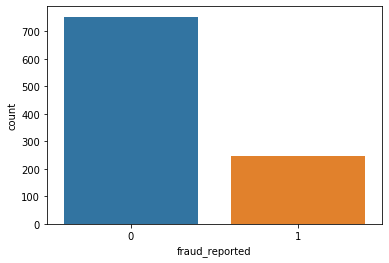

In [205]:
sns.countplot(df['fraud_reported'])
plt.show()

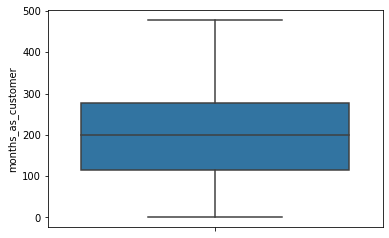

In [206]:
sns.boxplot(y=df['months_as_customer'])

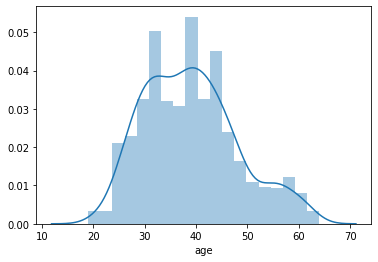

In [207]:
sns.distplot(df['age'])

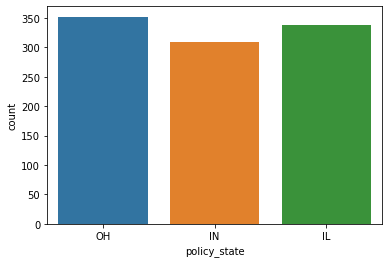

In [208]:
sns.countplot(df['policy_state'])

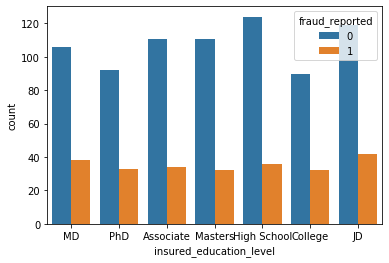

In [209]:
sns.countplot(df['insured_education_level'],hue=df['fraud_reported'])

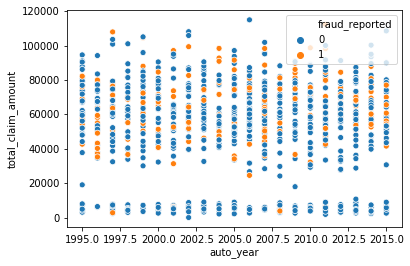

In [210]:
sns.scatterplot(x=df['auto_year'],y=df['total_claim_amount'],hue=df['fraud_reported'])

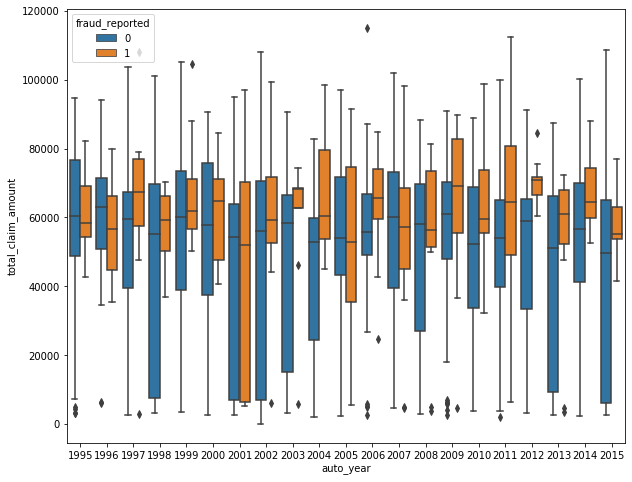

In [211]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['auto_year'],y=df['total_claim_amount'],hue=df['fraud_reported'])
plt.show()

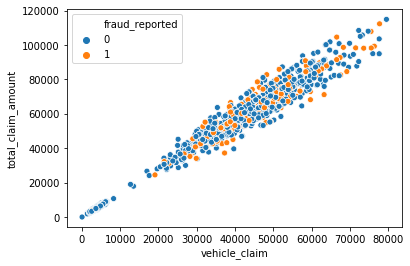

In [212]:
sns.scatterplot(x=df['vehicle_claim'],y=df['total_claim_amount'],hue=df['fraud_reported'])

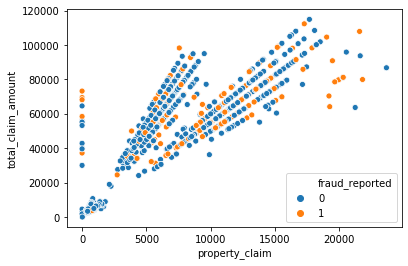

In [213]:
sns.scatterplot(x=df['property_claim'],y=df['total_claim_amount'],hue=df['fraud_reported'])

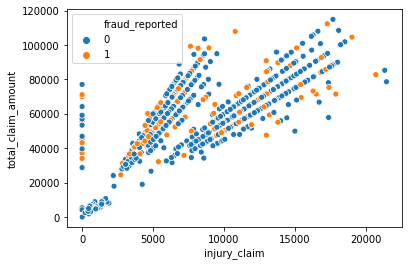

In [214]:
sns.scatterplot(x=df['injury_claim'],y=df['total_claim_amount'],hue=df['fraud_reported'])

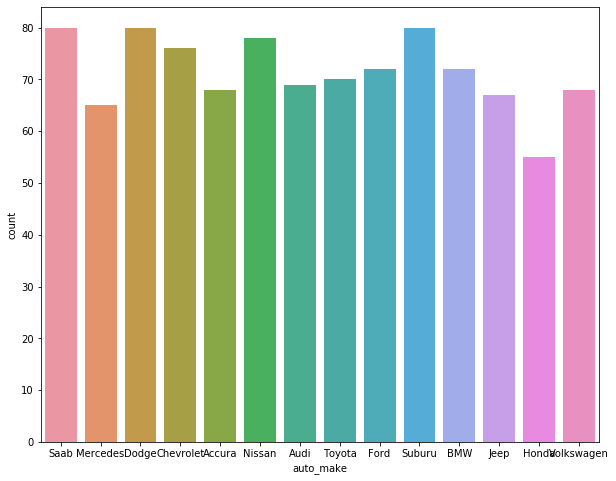

In [215]:
plt.figure(figsize=(10,8))
sns.countplot(df['auto_make'])
plt.show()

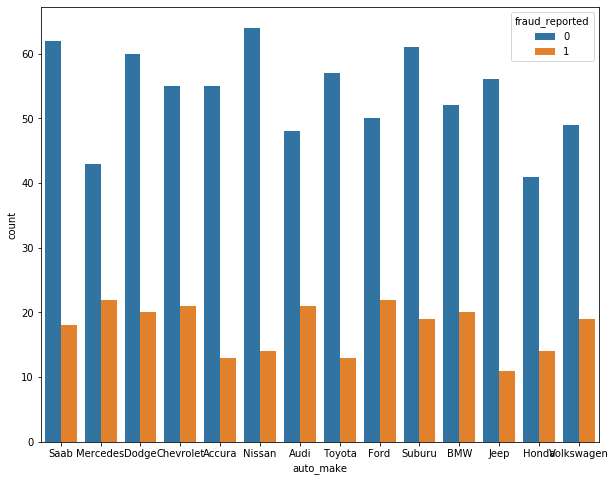

In [216]:
plt.figure(figsize=(10,8))
sns.countplot(df['auto_make'],hue=df['fraud_reported'])
plt.show()

In [217]:
df.drop('auto_model',axis=1,inplace=True)

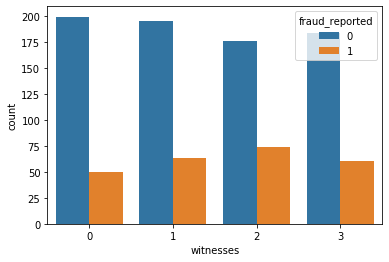

In [218]:
sns.countplot(x=df['witnesses'],hue=df['fraud_reported'])

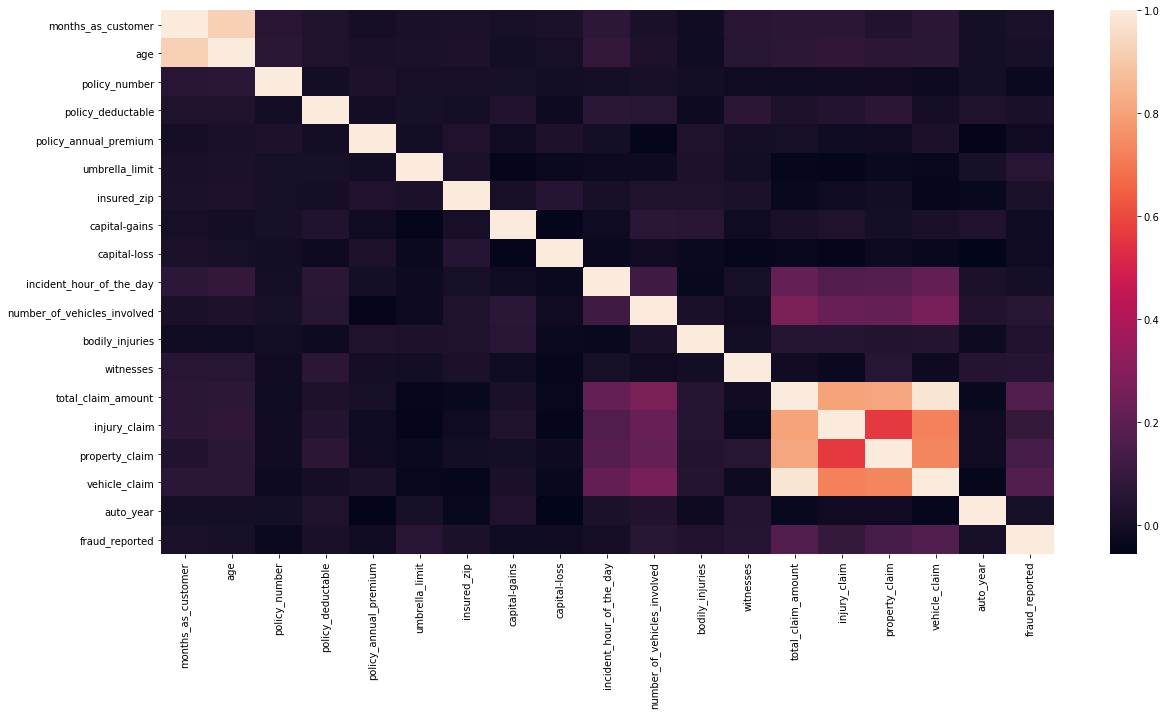

In [219]:
plt.figure(figsize = (20,10)) 
sns.heatmap(df.corr(),)

In [220]:
df.corr()

months_as_customer       age  policy_number  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  capital-gains  capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_year  fraud_reported
months_as_customer                     1.000000  0.922098       0.057555           0.026807               0.005018        0.015498     0.017895       0.006399      0.020209                  0.070639                     0.014736        -0.010162   0.058383            0.062108      0.065329        0.034940       0.061013  -0.000292        0.020544
age                                    0.922098  1.000000       0.059413           0.029188               0.014404        0.018126     0.025604      -0.007075      0.007368                  0.087161                     0.022102        -0.015679   0.052359            0.069863      0.075522        0.060898       0.062588   0.001354        0.012143
policy_number                          0.057555  0.059413       1.000000          -0.006738               0.022566        0.008968     0.007083       0.009802     -0.005669                  0.000113                     0.013432        -0.004558  -0.012661           -0.018009     -0.008762       -0.010678      -0.020184  -0.000183       -0.029443
policy_deductable                      0.026807  0.029188      -0.006738           1.000000              -0.003245        0.010870     0.004545       0.035212     -0.023544                  0.060935                     0.051214        -0.022765   0.066639            0.022839      0.039107        0.064792       0.005269   0.026105        0.014817
policy_annual_premium                  0.005018  0.014404       0.022566          -0.003245               1.000000       -0.006247     0.032354      -0.013738      0.023547                 -0.001578                    -0.045991         0.026780   0.002332            0.009094     -0.017633       -0.011654       0.020246  -0.049226       -0.014480
umbrella_limit                         0.015498  0.018126       0.008968           0.010870              -0.006247        1.000000     0.019671      -0.047268     -0.024056                 -0.023257                    -0.021270         0.022743  -0.006738           -0.040344     -0.045412       -0.023790      -0.038584   0.009893        0.058622
insured_zip                            0.017895  0.025604       0.007083           0.004545               0.032354        0.019671     1.000000       0.006303      0.049372                  0.008274                     0.027448         0.028695   0.019805           -0.033873     -0.017495       -0.006841      -0.041083  -0.032736        0.019368
capital-gains                          0.006399 -0.007075       0.009802           0.035212              -0.013738       -0.047268     0.006303       1.000000     -0.046904                 -0.016406                     0.061643         0.055829  -0.017651            0.015980      0.025934       -0.000779       0.015836   0.031398       -0.019173
capital-loss                           0.020209  0.007368      -0.005669          -0.023544               0.023547       -0.024056     0.049372      -0.046904      1.000000                 -0.025054                    -0.014895        -0.024418  -0.041330           -0.036060     -0.046060       -0.022863      -0.032665  -0.056615       -0.014863
incident_hour_of_the_day               0.070639  0.087161       0.000113           0.060935              -0.001578       -0.023257     0.008274      -0.016406     -0.025054                  1.000000                     0.120794        -0.034563   0.006527            0.217702      0.165768        0.179536       0.215626   0.021368        0.004316
number_of_vehicles_involved            0.014736  0.022102       0.013432           0.051214              -0.045991       -0.021270     0.027448       0.061643     -0.014895                  0.120794   

In [221]:
df.head()

months_as_customer  age  policy_number policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_year  fraud_reported
0                 328   48         521585           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1             YES                1          2               71610          6510           13020          52080       Saab       2004               1
1                 228   42         342868           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1               ?                0          0                5070           780             780           3510   Mercedes       2007               1
2                 134   29         687698           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3              NO                2          3               34650          7700            3850          23100      Dodge       2007               0
3                 256   41         227811           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision      Major Damage                Police             OH     Arlington                         5                            1               ?                1          2               63400          6340            6340          50720  Chevrolet       2014               1
4                 228   44         367455           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft      Minor Damage                  None             NY     Arlington                        20                            1              NO                0          1                6500          1300             650           4550     Accura       2009               0

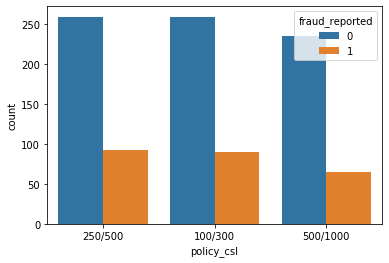

In [222]:
sns.countplot(df['policy_csl'],hue=df['fraud_reported'])

In [223]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [224]:
df.drop('property_damage',axis=1,inplace=True)
df.shape

(1000, 33)

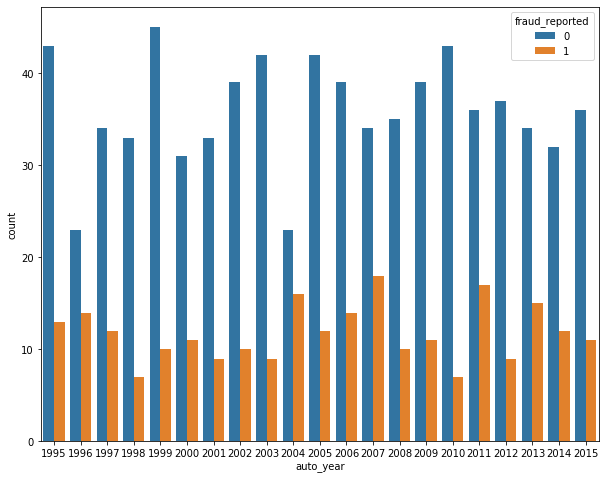

In [225]:
plt.figure(figsize=(10,8))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])

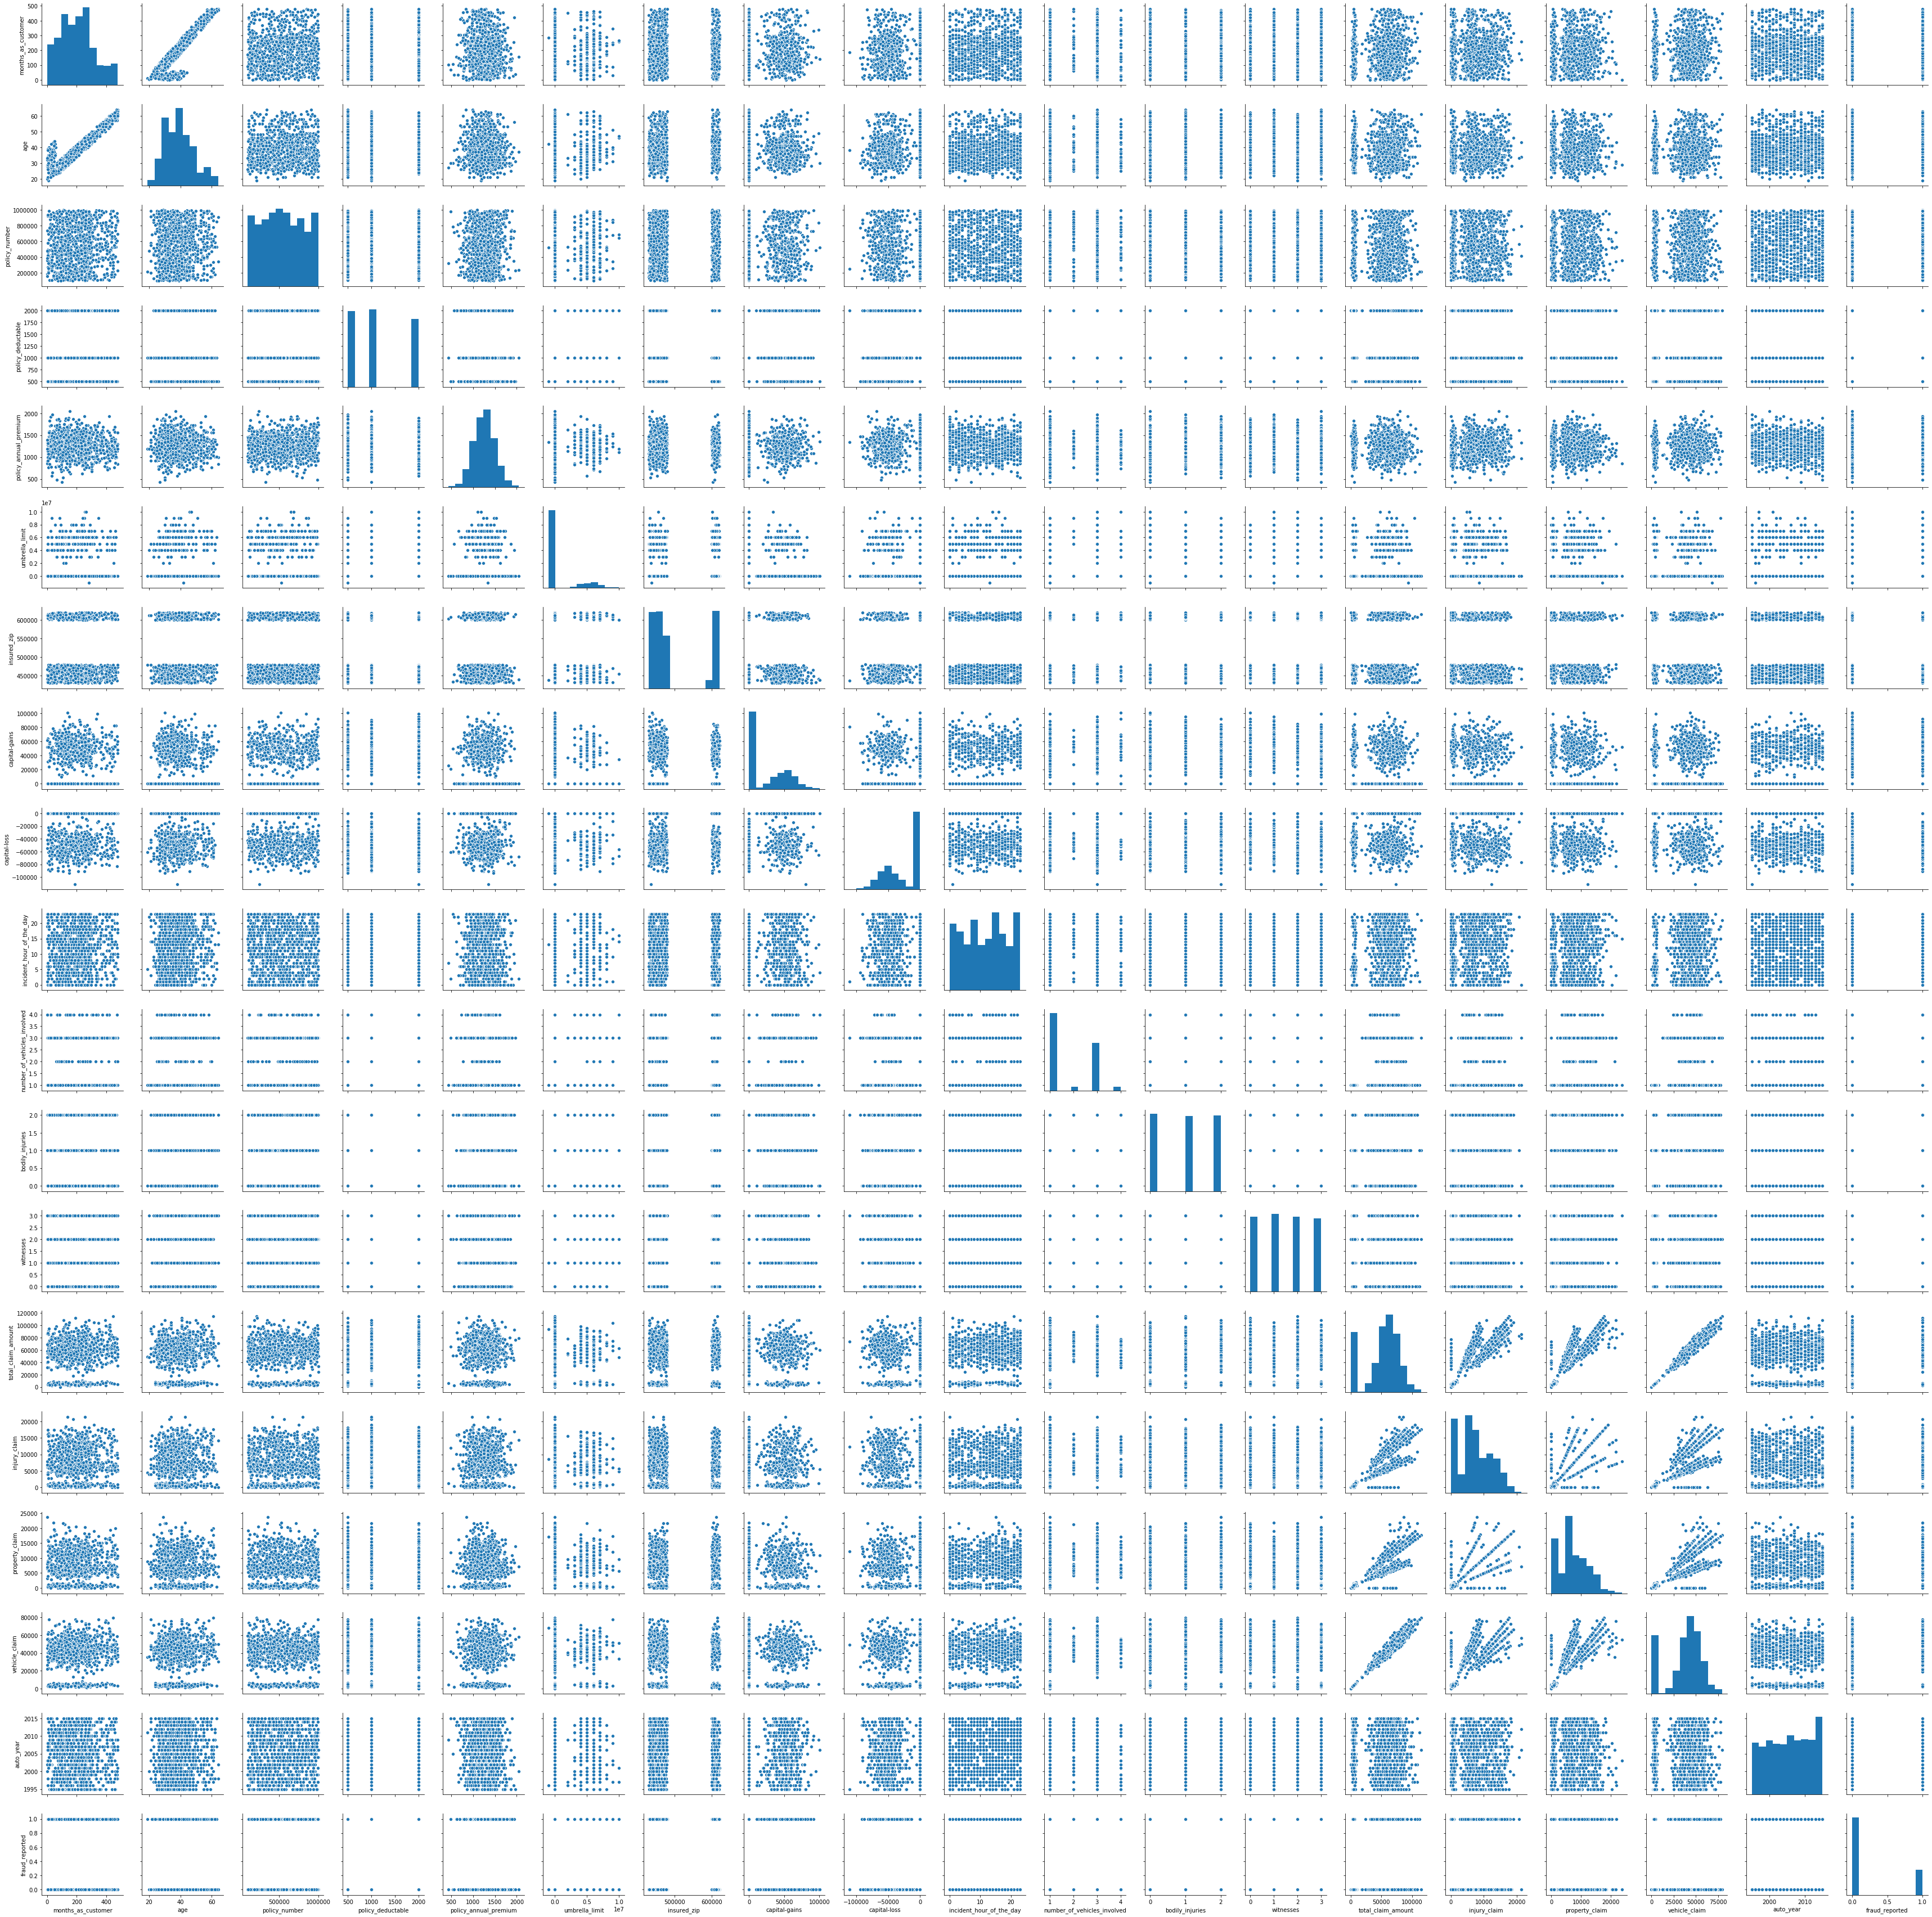

In [226]:
sns.pairplot(df)

In [227]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

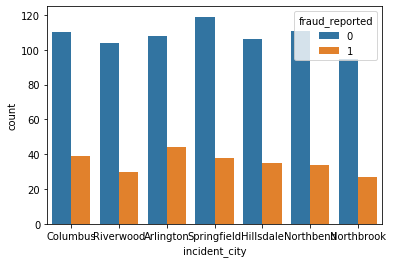

In [228]:
sns.countplot(df['incident_city'],hue=df['fraud_reported'])

In [229]:
policy_state=pd.get_dummies(df['policy_state'],drop_first=True,prefix='policy_state')
policy_state.head()

policy_state_IN  policy_state_OH
0                0                1
1                1                0
2                0                1
3                0                0
4                0                0

In [230]:
df=pd.concat([df,policy_state],axis=1)
df.drop('policy_state',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_number policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_year  fraud_reported  policy_state_IN  policy_state_OH
0                 328   48         521585    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab       2004               1                0                1
1                 228   42         342868    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes       2007               1                1                0
2                 134   29         687698    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge       2007               0                0                1
3                 256   41         227811    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision      Major Damage                Police             OH     Arlington                         5                            1                1          2               63400          6340            6340          50720  Chevrolet       2014               1                0                0
4                 228   44         367455   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft      Minor Damage                  None             NY     Arlington                        20                            1                0          1                6500          1300             650           4550     Accura       2009               0                0                0

In [231]:
df.drop(['policy_csl','policy_number','auto_year'],axis=1,inplace=True)
df.shape

(1000, 31)

In [232]:
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH
0                 328   48               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1
1                 228   42               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0
2                 134   29               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1
3                 256   41               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision      Major Damage                Police             OH     Arlington                         5                            1                1          2               63400          6340            6340          50720  Chevrolet               1                0                0
4                 228   44               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft      Minor Damage                  None             NY     Arlington                        20                            1                0          1                6500          1300             650           4550     Accura               0                0                0

In [233]:
insured_sex=pd.get_dummies(df['insured_sex'],drop_first=True,prefix='insured_sex')
df=pd.concat([df,insured_sex],axis=1)
df.drop('insured_sex',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE
0                 328   48               1000                1406.91               0       466132                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1
1                 228   42               2000                1197.22         5000000       468176                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1
2                 134   29               2000                1413.14         5000000       430632                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0
3                 256   41               2000                1415.74         6000000       608117                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision      Major Damage                Police             OH     Arlington                         5                            1                1          2               63400          6340            6340          50720  Chevrolet               1                0                0                 0
4                 228   44               1000                1583.91         6000000       610706               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft      Minor Damage                  None             NY     Arlington                        20                            1                0          1                6500          1300             650           4550     Accura               0                0                0                 1

In [234]:
df.shape

(1000, 31)

In [235]:
df.drop('insured_zip',axis=1,inplace=True)
df.shape

(1000, 30)

In [236]:
insured_education_level=pd.get_dummies(df['insured_education_level'],drop_first=True,prefix='insured_education_level')
df=pd.concat([df,insured_education_level],axis=1)
df.drop('insured_education_level',axis=1,inplace=True)

In [237]:
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD
0                 328   48               1000                1406.91               0       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0
1                 228   42               2000                1197.22         5000000  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0
2                 134   29               2000                1413.14         5000000              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1
3                 256   41               2000                1415.74         6000000       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision      Major Damage                Police             OH     Arlington                         5                            1                1          2               63400          6340            6340          50720  Chevrolet               1                0                0                 0                                0                                    0                           0                           0                                0                            1
4                 228   44               1000                1583.91         6000000              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft      Minor Damage                  None             NY     Arlington                        20                            1                0          1                6500          1300             650           4550     Accura               0                0                0                 1                            

In [238]:
insured_occupation=pd.get_dummies(df['insured_occupation'],drop_first=True,prefix='insured_occupation')
df=pd.concat([df,insured_occupation],axis=1)
df.drop('insured_occupation',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                 328   48               1000                1406.91               0        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0   
1                 228   42               2000                1197.22         5000000         reading       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0   
2                 134   29               2000                1413.14         5000000     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0   
3              

In [239]:
insured_hobbies=pd.get_dummies(df['insured_hobbies'],drop_first=True,prefix='insured_hobbies')
df=pd.concat([df,insured_hobbies],axis=1)
df.drop('insured_hobbies',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit insured_relationship  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                 328   48               1000                1406.91               0              husband          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0   
1                 228   42               2000                1197.22         5000000       other-relative              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0   
2                 134   29               2000                1413.14         5000000            own-child          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0   
3                 256   41               2000                1415.74         60

In [240]:
insured_relationship=pd.get_dummies(df['insured_relationship'],drop_first=True,prefix='insured_relationship')
df=pd.concat([df,insured_relationship],axis=1)
df.drop('insured_relationship',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss incident_date             incident_type incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                 328   48               1000                1406.91               0          53300             0    25-01-2015  Single Vehicle Collision      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0   
1                 228   42               2000                1197.22         5000000              0             0    21-01-2015             Vehicle Theft      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0                                   0   
2                 134   29               2000                1413.14         5000000          35100             0    22-02-2015   Multi-vehicle Collision      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0   
3                 2

In [241]:
incident_type=pd.get_dummies(df['incident_type'],drop_first=True,prefix='incident_type')
df=pd.concat([df,incident_type],axis=1)
df.drop('incident_type',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss incident_date incident_severity authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  \
0                 328   48               1000                1406.91               0          53300             0    25-01-2015      Major Damage                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         0   
1                 228   42               2000                1197.22         5000000              0             0    21-01-2015      Minor Damage                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0                                   0                         0   
2                 134   29               2000                1413.14         5000000          35100             0    22-02-2015      Minor Damage                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         1   
3                 2

In [242]:
incident_severity=pd.get_dummies(df['incident_severity'],drop_first=True,prefix='incident_severity')
df=pd.concat([df,incident_severity],axis=1)
df.drop('incident_severity',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss incident_date authorities_contacted incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  \
0                 328   48               1000                1406.91               0          53300             0    25-01-2015                Police             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         0   
1                 228   42               2000                1197.22         5000000              0             0    21-01-2015                Police             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0                                   0                         0   
2                 134   29               2000                1413.14         5000000          35100             0    22-02-2015                Police             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         1   
3                 256   41               2000                1415.74         6000000       

In [243]:
authorities_contacted=pd.get_dummies(df['authorities_contacted'],drop_first=True,prefix='authorities_contacted')
df=pd.concat([df,authorities_contacted],axis=1)
df.drop('authorities_contacted',axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss incident_date incident_state incident_city  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  \
0                 328   48               1000                1406.91               0          53300             0    25-01-2015             SC      Columbus                         5                            1                1          2               71610          6510           13020          52080       Saab               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         0                                0   
1                 228   42               2000                1197.22         5000000              0             0    21-01-2015             VA     Riverwood                         8                            1                0          0                5070           780             780           3510   Mercedes               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0                                   0                         0                                0   
2                 134   29               2000                1413.14         5000000          35100             0    22-02-2015             NY      Columbus                         7                            3                2          3               34650          7700            3850          23100      Dodge               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         1                                0   
3                 256   41               2000  

In [244]:
df.drop(['incident_state','incident_city','auto_make'],axis=1,inplace=True)
df.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss incident_date  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  fraud_reported  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  \
0                 328   48               1000                1406.91               0          53300             0    25-01-2015                         5                            1                1          2               71610          6510           13020          52080               1                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         0                                0                                    0   
1                 228   42               2000                1197.22         5000000              0             0    21-01-2015                         8                            1                0          0                5070           780             780           3510               1                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0                                   0                         0                                0                                    0   
2                 134   29               2000                1413.14         5000000          35100             0    22-02-2015                         7                            3                2          3               34650          7700            3850          23100               0                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         1                                0                                    0   
3                 256   41               2000              

In [245]:
df.drop('incident_date',axis=1,inplace=True)
df.shape

(1000, 72)

### Splitting the Data into Training and Testing Sets

In [246]:
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [247]:
X.head()

months_as_customer  age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  insured_hobbies_basketball  \
0                 328   48               1000                1406.91               0          53300             0                         5                            1                1          2               71610          6510           13020          52080                0                1                 1                                0                                    0                           0                           1                                0                            0                                0                                1                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         0                                0                                    0                           0   
1                 228   42               2000                1197.22         5000000              0             0                         8                            1                0          0                5070           780             780           3510                1                0                 1                                0                                    0                           0                           1                                0                            0                                0                                0                                   0                                   0                                     0                                     1                                 0                                   0                                  0                                   0                         0                                0                                    0                           0   
2                 134   29               2000                1413.14         5000000          35100             0                         7                            3                2          3               34650          7700            3850          23100                0                1                 0                                0                                    0                           0                           0                                0                            1                                0                                0                                   0                                   0                                     0                                     0                                 0                                   0                                  0                                   0                         1                                0                                    0                           0   
3                 256   41               2000                1415.7

In [248]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [249]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [250]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 71)
(300, 71)
(700,)
(300,)


### Scaling

In [251]:
scaler=StandardScaler()

In [252]:
X_train_scl=scaler.fit_transform(X_train)
X_train_scl

array([[ 0.04569648,  0.24309631, -0.22844661, ..., -0.33597259,
        -0.5       , -0.64575851],
       [-0.83891459, -0.64608679,  1.42013715, ..., -0.33597259,
        -0.5       ,  1.54856652],
       [ 1.10722977,  0.79883575, -1.05273848, ..., -0.33597259,
         2.        , -0.64575851],
       ...,
       [ 1.47876642,  1.79916674,  1.42013715, ...,  2.97643326,
        -0.5       , -0.64575851],
       [-0.29930184,  0.02080053,  1.42013715, ..., -0.33597259,
        -0.5       ,  1.54856652],
       [ 0.68261645,  0.46539208, -0.22844661, ..., -0.33597259,
        -0.5       , -0.64575851]])

In [253]:
X_train_scl=pd.DataFrame(X_train_scl,columns=X_train.columns)
X_train_scl.head()

months_as_customer       age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  insured_hobbies_basketball  \
0            0.045696  0.243096          -0.228447              -0.501577       -0.501936      -0.923778      0.944018                  0.960992                    -0.806705         1.226027   0.476927            0.682512     -0.051878        1.418003       0.611574         1.462537        -0.720027         -0.941697                         2.654426                            -0.436436                   -0.441066                   -0.424780                        -0.398673                    -0.366772                        -0.268282                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            -0.26521                          -0.319941                           -0.271329                 -0.289122                         3.391165                            -0.252646                   -0.184319   
1           -0.838915 -0.646087           1.420137              -2.314945       -0.501936      -0.923778      0.944018                 -0.824527                     1.185159        -1.184701  -0.430271            0.496590     -0.274010        0.962540       0.522180        -0.683744        -0.720027         -0.941697                        -0.376729                            -0.436436                    2.267234                   -0.424780                        -0.398673                    -0.366772                         3.727414                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            -0.26521                          -0.319941                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
2            1.107230  0.798836          -1.052738               0.239538       -0.501936      -0.031487      0.944018                 -1.717287                    -0.806705         1.226027   1.384126            0.719697      1.151338       -0.157141       0.748018        -0.683744        -0.720027         -0.941697                        -0.376729                            -0.436436                   -0.441066                    2.354157                        -0.398673                    -0.366772                        -0.268282                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            -0.26521                           3.125577                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
3            0.709155  0.243096          -1.052

In [254]:
X_test_scl=scaler.transform(X_test)
X_test_scl

array([[-0.96276014, -0.97953046,  1.42013715, ..., -0.33597259,
        -0.5       , -0.64575851],
       [ 2.40760805,  2.02146251, -1.05273848, ..., -0.33597259,
        -0.5       ,  1.54856652],
       [ 2.09799417,  1.79916674, -1.05273848, ..., -0.33597259,
        -0.5       ,  1.54856652],
       ...,
       [ 0.27569536,  0.24309631, -1.05273848, ..., -0.33597259,
        -0.5       ,  1.54856652],
       [ 2.34568527,  2.57720195, -1.05273848, ..., -0.33597259,
        -0.5       , -0.64575851],
       [-1.75891011, -0.53493891, -1.05273848, ..., -0.33597259,
        -0.5       ,  1.54856652]])

In [255]:
X_test_scl=pd.DataFrame(X_test_scl,columns=X_test.columns)
X_test_scl.head()

months_as_customer       age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  insured_hobbies_basketball  \
0           -0.962760 -0.979530           1.420137              -0.951140       -0.501936      -0.923778     -0.938496                  1.109785                    -0.806705         0.020663   1.384126            0.487200     -0.158830       -0.152924       0.756382         1.462537        -0.720027         -0.941697                        -0.376729                             2.291288                   -0.441066                    -0.42478                        -0.398673                    -0.366772                         3.727414                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                           -0.265210                          -0.319941                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
1            2.407608  2.021463          -1.052738              -0.164302       -0.501936       1.501238     -2.033647                  1.258578                    -0.806705        -1.184701   0.476927            1.009285     -0.140319        1.236661       1.133825        -0.683744         1.388838          1.061913                        -0.376729                            -0.436436                   -0.441066                    -0.42478                         2.508319                    -0.366772                        -0.268282                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                           -0.265210                          -0.319941                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
2            2.097994  1.799167          -1.052738               0.078974       -0.501936      -0.923778     -1.067337                  0.960992                     1.185159         1.226027  -0.430271            0.385787     -0.214363       -0.209857       0.643463        -0.683744        -0.720027         -0.941697                        -0.376729                            -0.436436                   -0.441066                    -0.42478                        -0.398673                    -0.366772                        -0.268282                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            3.770596                          -0.319941                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
3           -0.467378 -0.868383          -0.228

### PCA

In [256]:
pca=PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train_scl)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [257]:
pca.components_

array([[-5.16592981e-02, -5.85983202e-02, -2.24347321e-02, ...,
         2.83578055e-01, -1.23968328e-01,  9.54440412e-02],
       [ 6.22749728e-01,  6.20497573e-01,  8.34592568e-02, ...,
         2.55292298e-02, -4.51861923e-02,  3.35121580e-02],
       [ 1.40319126e-01,  1.28962509e-01, -1.38681109e-01, ...,
         8.33467451e-03, -1.26959329e-02, -3.11582164e-03],
       ...,
       [ 6.29415832e-03,  4.59909009e-03, -4.16495848e-03, ...,
         4.56270374e-03, -2.84384349e-02, -7.26885058e-03],
       [-4.24601240e-02,  4.47325851e-02, -3.17806380e-03, ...,
         2.97864261e-02,  1.59155665e-04,  1.14205492e-02],
       [-3.11926347e-17, -8.39864892e-17, -4.37748931e-17, ...,
        -2.77555756e-17,  4.85722573e-17, -4.16333634e-17]])

In [258]:
# Creating a dataframe of Features and first 2 principal components.

colnames = list(X_train_scl.columns)
pca_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
pca_df.head()

Feature       PC1       PC2
0     months_as_customer -0.051659  0.622750
1                    age -0.058598  0.620498
2      policy_deductable -0.022435  0.083459
3  policy_annual_premium -0.007755  0.002845
4         umbrella_limit  0.014600  0.023028

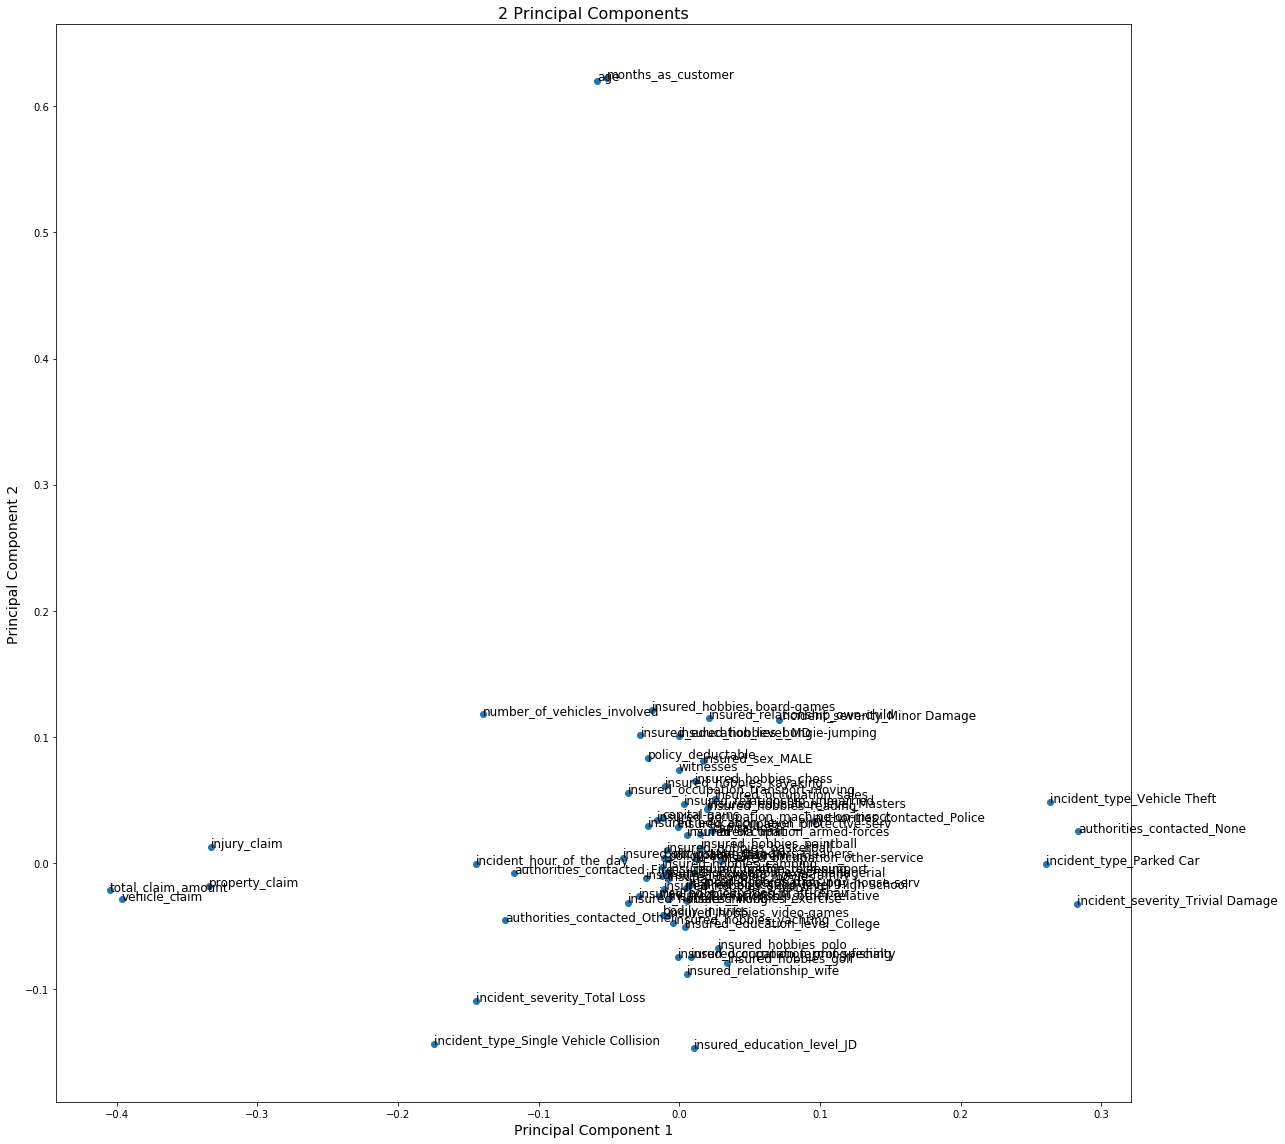

In [259]:
# Plotting a scatter plot for the first 2 principal components.

fig = plt.figure(figsize = (18,16))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)
plt.title('2 Principal Components', fontsize=16)
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]), fontsize = 12)
plt.tight_layout()
plt.show()

In [260]:
# Looking at the variance ratios.

pca.explained_variance_ratio_

array([7.86217994e-02, 2.91165307e-02, 2.66080817e-02, 2.49562338e-02,
       2.40377610e-02, 2.28805388e-02, 2.19666546e-02, 2.18647056e-02,
       2.13370322e-02, 2.08842115e-02, 2.07494441e-02, 2.03290810e-02,
       1.97618510e-02, 1.91428172e-02, 1.86693775e-02, 1.85736513e-02,
       1.80778858e-02, 1.77856544e-02, 1.77037465e-02, 1.74294756e-02,
       1.71353045e-02, 1.70131854e-02, 1.66611273e-02, 1.63492054e-02,
       1.60055579e-02, 1.57967088e-02, 1.54356235e-02, 1.53418427e-02,
       1.52751163e-02, 1.48377385e-02, 1.47893670e-02, 1.42586403e-02,
       1.42001109e-02, 1.40779561e-02, 1.37930076e-02, 1.36693365e-02,
       1.33904978e-02, 1.31989889e-02, 1.29351125e-02, 1.28441546e-02,
       1.27049175e-02, 1.23543791e-02, 1.22101893e-02, 1.20752172e-02,
       1.18232058e-02, 1.17680273e-02, 1.16634069e-02, 1.12588526e-02,
       1.10544728e-02, 1.07050634e-02, 1.03936042e-02, 1.01821616e-02,
       9.94978264e-03, 9.70385638e-03, 9.25532237e-03, 8.80668719e-03,
      

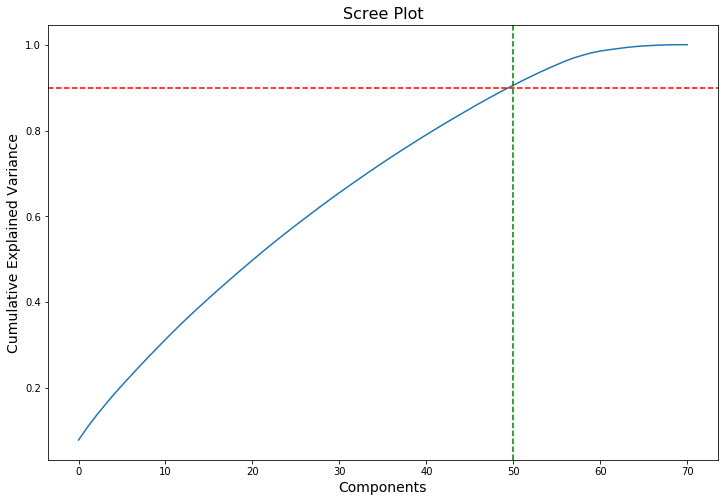

In [261]:
# Making the 'Screeplot' - plotting the cummulative variance against the number of components.

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)
plt.title('Scree Plot', fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=50, color='g', linestyle='--')
plt.show()

In [262]:
# Using incremental PCA for selecting the components.

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [263]:
# Performing fit_transform on the train dataset.

df_comp_train = pca_final.fit_transform(X_train_scl)
df_comp_train.shape

(700, 50)

In [264]:
df_comp_train=pd.DataFrame(df_comp_train)
df_comp_train.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49
0  1.413193 -0.154914 -1.309798  0.856498 -0.231796  0.219677 -0.009641 -1.681092  1.457946  0.265655  0.375974 -1.913274 -0.470789 -0.180440  1.504272 -1.160485 -1.225895  1.371541  0.089665 -0.525464 -1.094730 -0.021542  0.119098  0.124906  1.239904 -0.899368  1.344693  1.590495  0.416889 -1.678544  0.215752 -2.248321 -0.179867  1.831617 -0.638956 -0.933437  0.445281  1.582233 -0.560722  0.284161 -0.396024 -0.378805  0.973938 -0.304348 -0.554998 -1.932793  0.765508  1.047613  0.492087 -0.521490
1  0.481735 -1.138012  0.640217 -0.650142  1.658597  1.460167  1.160523  0.533185  3.046527 -0.292685 -0.007090 -1.849618 -1.194672 -0.837521  0.703598 -2.483790  0.408957 -0.181454  2.042610 -1.001280 -1.865316  0.507485 -0.247862  0.385258 -1.326212  0.275209 -0.707860 -0.759938 -0.225966  0.622915  0.943955  0.034647  0.148464 -2.641554 -0.404282 -0.280703 -0.761261 -1.419031  0.267436 -1.713930 -0.732515  0.069271 -0.346376  0.358045  0.098993  0.897022 -0.331561 -1.320014  0.824230 -0.532891
2  1.831934  0.252879 -2.417861 -1.724927 -0.405611  0.716952  0.329759  0.373500 -1.013112 -1.522235 -0.630726 -2.583080 -0.760070  0.390984 -0.521998 -2.160792 -2.140699  1.260084 -0.064555  2.055875 -0.681010 -0.803473 -1.313251 -0.117184 -0.390472  0.697040 -0.148342 -0.254017 -0.072914  0.861826  0.161561 -1.038776 -0.145944 -1.566730  1.680380  0.869374  0.725842 -1.466883  0.693663 -0.156521 -0.244354 -0.096689 -0.351886 -0.041766 -1.370032  0.277915 -0.903332 -1.154594  0.064833 -1.403456
3 -0.217397  1.278219  1.731949 -0.654929  0.010442  0.053420 -1.355815  0.454728 -1.146091 -1.056108  0.866651  1.467170 -2.692969  0.509756 -0.800931  0.319895 -0.462246 -0.345392 -1.048708 -0.192670 -0.662436 -1.030462  0.070914 -1.265622  1.240747  0.954298 -0.072312 -1.123898  0.864966  0.511738  1.578356 -0.459405  0.578169 -0.210217  0.668686 -0.983977  0.591642 -0.187281 -1.076183 -1.653878  1.001586  0.673814 -0.279377 -1.689366  1.457102 -0.070960  0.075496  0.496594 -0.367995 -0.357646
4  1.947831 -3.170207  0.045662 -2.475755  0.834099 -0.176495  0.472209  0.815693  0.715738  1.337236  0.495055 -1.434785  1.583159  0.943587 -0.000314  0.457190  1.468661  0.809337 -0.463133  0.726379  1.047891 -1.052328  0.400586 -0.402570  0.215961  0.158538  0.309566 -0.481507  0.281242  0.407156  1.575478 -1.707657 -1.769280 -0.484150  1.268125  1.116782  0.127076  0.064811  2.319245 -0.246843 -0.159963 -1.279600 -1.791916  1.114359  0.520461 -0.957990  1.371547 -0.114809 -0.144413  0.805082

In [265]:
# Performing fit_transform on the train dataset.

df_comp_test = pca_final.transform(X_test_scl)
df_comp_test.shape

(300, 50)

In [266]:
df_comp_test=pd.DataFrame(df_comp_test)
df_comp_test.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49
0  1.037704 -1.465591 -0.190099  1.676272  1.103130 -0.816719  0.706513 -0.404898  1.209775 -0.013622  0.565275  0.375073  0.500535  1.174724 -0.330038 -0.348294  0.646327  1.071885  1.798457  0.950285 -1.867054  0.311609  0.920716 -0.867615 -0.434163 -1.444874 -0.264493  1.179316  0.595034 -0.175146 -1.112052  1.816917 -0.312636 -0.134033  0.098569 -0.376383 -1.027338 -0.022578 -1.138982 -1.426441  0.455353  0.350147 -0.252824  1.432028  3.316340  0.331363  0.573104 -0.522557 -0.408824 -1.332912
1  1.619006  3.061118 -0.832982  2.125740 -1.281502  0.425215 -0.924553  0.078582  1.697060 -1.365022  0.214702  0.863966 -0.285116  0.022824 -0.291419  0.283392  1.766435 -0.767596 -0.403027  1.423830  0.997538  0.202154 -0.369073 -0.166241 -1.082994  0.409809  0.018451  0.361615  0.758469  1.671679  1.038438  0.011691  0.753850  0.591763  2.588178 -1.186090 -0.423154  0.958676 -0.244485 -0.170516  1.345691  1.976235  0.457223  0.933244 -0.426208 -0.947796  0.512489  0.397349  0.796664  1.037838
2  0.428187  2.607690  0.947857  0.503160  1.015475  1.776739 -1.183506 -1.485470  0.941945  0.244393 -0.131283  0.510196  0.643426  0.415126  1.068925  0.794683 -0.242335  0.667781 -0.456615  0.747191  0.427903  0.295513 -1.405323 -1.230894  0.590972  0.523474 -0.244489 -1.830156 -1.263312  0.708328  1.445420 -1.233224 -0.846363  0.350146 -0.588975  0.516024 -0.219616  0.138481 -0.986198  0.745554 -0.507522  1.413906 -1.931703 -1.038427  2.211005 -0.215454  0.954807  0.554118 -0.004940 -0.806404
3  0.758407 -0.136285 -0.269063 -1.776197  1.280305  0.726967 -0.167075  0.543992  0.924581  0.638234 -0.571046  0.576661 -0.561684  0.949816 -1.401314  0.598551  0.342691 -0.224635 -0.346818 -0.962382  0.957324  0.820778 -0.168060  0.483926  0.015166 -1.861204  0.338219  1.657827 -0.015160  0.515104  0.012971  1.008597  0.601004  1.059585  0.657442  0.285049  0.277936 -0.842993  0.293854 -0.311716 -0.304448  1.040389  0.579949  0.210574 -0.912454  0.073925  0.345324 -1.092427  0.613164  0.154389
4  0.749240  0.030039  1.629565 -0.699042  2.876682 -0.466356  1.862294 -1.233347  1.002678 -1.737788  2.055843  0.486835 -1.093001 -0.792671  1.108329  2.111331  0.704091  1.603824  0.510820 -0.300077  1.938283  0.369366  1.554119  1.178298 -0.644024  1.072346 -0.724341  0.718239  0.040065  0.796004 -0.640313  0.285131 -0.144802 -0.359269  0.448992  0.352373  1.228303  0.978683 -1.640184 -0.816245 -1.839766 -0.473947  0.910963 -1.017768 -0.221909 -0.360224 -0.825288 -0.289195 -0.031636  0.490670

### Building a Logistic Regression Model

In [267]:
log1=LogisticRegression()
lr_model=log1.fit(df_comp_train,y_train)

In [268]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
y_test_pred_prb=lr_model.predict(df_comp_test)
y_test_pred_prb[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [270]:
metrics.accuracy_score(y_test,y_test_pred_prb)

0.77

In [271]:
metrics.confusion_matrix(y_test,y_test_pred_prb)

array([[208,  17],
       [ 52,  23]], dtype=int64)

In [272]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1)

In [273]:
grid_search.fit(df_comp_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    8.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [274]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.7929 by using {'C': 0.1, 'penalty': 'l2'}


In [275]:
logreg1=LogisticRegression(C=0.1, penalty= 'l2')
logreg1.fit(df_comp_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
y_test_pred_cv=logreg1.predict(df_comp_test)

In [277]:
y_test_pred_cv[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [278]:
metrics.accuracy_score(y_test,y_test_pred_cv).round(4)

0.7733

In [279]:
metrics.confusion_matrix(y_test,y_test_pred_cv)

array([[210,  15],
       [ 53,  22]], dtype=int64)

In [280]:
# Defining a function to plot ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize=18)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.legend(loc="lower right")
    plt.show()

    return None

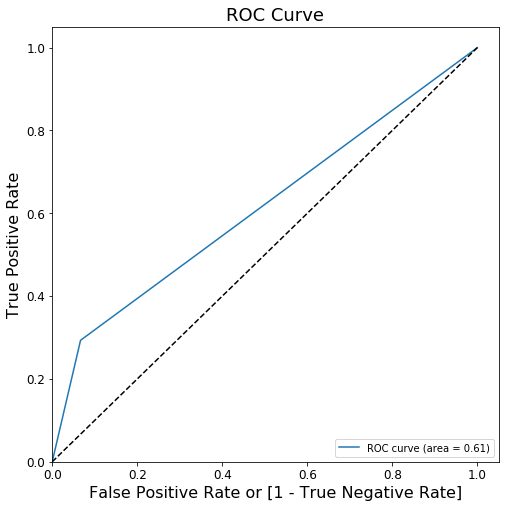

In [281]:
# Plotting the ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_cv, drop_intermediate = False)

draw_roc(y_test, y_test_pred_cv)

### Building a Random Forest Classifier Model

In [282]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

rf_tune = RandomForestClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = rf_tune, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [283]:
grid_search.fit(df_comp_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   45.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [284]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.7543 by using {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [285]:
rf=RandomForestClassifier(max_depth= 3, max_features= 10, min_samples_leaf= 100, min_samples_split= 100, n_estimators= 100)
rf.fit(df_comp_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [286]:
y_pred_rf=rf.predict(df_comp_test)
y_pred_rf[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [287]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_rf)


array([[225,   0],
       [ 75,   0]], dtype=int64)

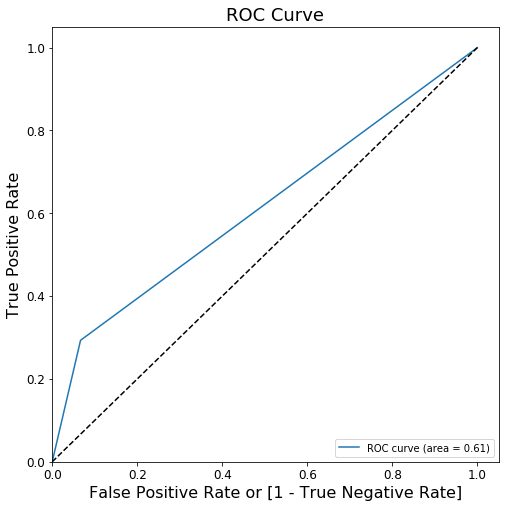

In [288]:
# Plotting the ROC curve.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf, drop_intermediate = False)

draw_roc(y_test, y_test_pred_cv)

### Building a XGBoostClassifier Model

In [291]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

xgb_tune = XGBClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [292]:
grid_search.fit(df_comp_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [10, 12, 14],
                         'min_samples_leaf': range(100, 400, 

In [293]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.7943 by using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [294]:
xgb_model=XGBClassifier(max_depth= 5,max_features= 10,min_samples_leaf= 100,min_samples_split= 100,n_estimators= 100)
xgb_model.fit(df_comp_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5, max_features=10,
              min_child_weight=1, min_samples_leaf=100, min_samples_split=100,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [295]:
y_pred_xgb=xgb_model.predict(df_comp_test)
y_pred_xgb[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [296]:
metrics.confusion_matrix(y_test,y_pred_xgb)

array([[210,  15],
       [ 60,  15]], dtype=int64)

In [297]:
X_train_scl.head()

months_as_customer       age  policy_deductable  policy_annual_premium  umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  policy_state_IN  policy_state_OH  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  insured_hobbies_basketball  \
0            0.045696  0.243096          -0.228447              -0.501577       -0.501936      -0.923778      0.944018                  0.960992                    -0.806705         1.226027   0.476927            0.682512     -0.051878        1.418003       0.611574         1.462537        -0.720027         -0.941697                         2.654426                            -0.436436                   -0.441066                   -0.424780                        -0.398673                    -0.366772                        -0.268282                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            -0.26521                          -0.319941                           -0.271329                 -0.289122                         3.391165                            -0.252646                   -0.184319   
1           -0.838915 -0.646087           1.420137              -2.314945       -0.501936      -0.923778      0.944018                 -0.824527                     1.185159        -1.184701  -0.430271            0.496590     -0.274010        0.962540       0.522180        -0.683744        -0.720027         -0.941697                        -0.376729                            -0.436436                    2.267234                   -0.424780                        -0.398673                    -0.366772                         3.727414                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            -0.26521                          -0.319941                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
2            1.107230  0.798836          -1.052738               0.239538       -0.501936      -0.031487      0.944018                 -1.717287                    -0.806705         1.226027   1.384126            0.719697      1.151338       -0.157141       0.748018        -0.683744        -0.720027         -0.941697                        -0.376729                            -0.436436                   -0.441066                    2.354157                        -0.398673                    -0.366772                        -0.268282                        -0.286211                            -0.26521                           -0.242902                             -0.236235                             -0.319941                         -0.286211                            -0.26521                           3.125577                           -0.271329                 -0.289122                        -0.294884                            -0.252646                   -0.184319   
3            0.709155  0.243096          -1.052

In [298]:
xgb_model.fit(X_train_scl,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5, max_features=10,
              min_child_weight=1, min_samples_leaf=100, min_samples_split=100,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [299]:
y_pred_xgb_final=xgb_model.predict(X_test_scl)

In [300]:
metrics.confusion_matrix(y_test,y_pred_xgb_final)

array([[203,  22],
       [ 38,  37]], dtype=int64)

In [301]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

xgb_tune = XGBClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [302]:
grid_search.fit(X_train_scl,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [10, 12, 14],
                         'min_samples_leaf': range(100, 400, 

In [304]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.8114 by using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}


In [309]:
xgb_model1=XGBClassifier(max_depth= 5,max_features=10,min_samples_leaf=100,min_samples_split= 100,n_estimators=200)
xgb_model1.fit(X_train_scl,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5, max_features=10,
              min_child_weight=1, min_samples_leaf=100, min_samples_split=100,
              missing=None, n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [310]:
y_pred_final_xgb=xgb_model1.predict(X_test_scl)
y_pred_final_xgb[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [311]:
metrics.accuracy_score(y_test,y_pred_final_xgb)

0.81

In [312]:
metrics.confusion_matrix(y_test,y_pred_final_xgb)

array([[206,  19],
       [ 38,  37]], dtype=int64)